In [74]:
%matplotlib inline

# Transition Matrix Part 2

In [36]:
import pandas as pd

In [75]:
import matplotlib.pyplot as plt

In [37]:
df_merged = pd.read_csv('../_data/df_subway_merged.csv')

In [48]:
df_merged['localTimestamp'] = pd.to_datetime(df_merged['localTimestamp'])

In [42]:
list_lines = df_merged['line_name'].unique()

In [43]:
list_lines

array(['Toei Mita Line', 'Tokyo Metro Yurakucho Line',
       'Tokyo Metro Marunouchi Line', 'Tokyo Metro Tozai Line',
       'Tokyo Metro Hanzomon Line', 'Toei Shinjuku Line',
       'Tokyo Metro Hibiya Line', 'Tokyo Metro Chiyoda Line',
       'Toei Oedo Line', 'Tokyo Metro Ginza Line', 'Toei Asakusa Line',
       'Tokyo Metro Namboku Line', 'Tokyo Metro Fukutoshin Line'], dtype=object)

In [70]:
def plot_usage_of_checkins_custom(start_date, end_date, df, plot=False):
    """start_date: 'YYYY-MM-DD'"""
    df = df[(df['localTimestamp'] > start_date) & 
                     (df['localTimestamp'] < end_date)]
    # Count check-ins by hour, then group by hour and take mean of this across days
    df = df[['localTimestamp', 'venueId']].groupby(pd.Grouper(key='localTimestamp', freq='1H')).count()
    df['hour'] = df.index.map(lambda x: x.hour)
    df_hr_mean = df.groupby('hour').mean()
    if plot:
        df_hr_mean.plot(kind='bar', title="Check-in Histogram for {} to {}".format(start_date, end_date)).set_ylabel("average check-ins")
    return df_hr_mean

## Algorithm 1: Transition Matrix from Stationary Distributions  

For each line:  
* Group the line data by hour  
* For each hour group:
  * Find the average number of stops per station $:=$ stationary distribution  
  * Solve for the transition matrix that makes this possible (assuming this is analytically solvable)

### Example: Toei Mita Line

In [49]:
df_mita = df_merged[df_merged['line_name'] == 'Toei Mita Line']

In [50]:
df_mita['localTimestamp'][0]

Timestamp('2012-04-04 02:59:52')

In [51]:
df_mita['hour'] = df_mita['localTimestamp'].map(lambda x: x.hour)

/Users/michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [112]:
df_mita['day'] = df_mita['localTimestamp'].map(lambda x: x.day)

/Users/michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


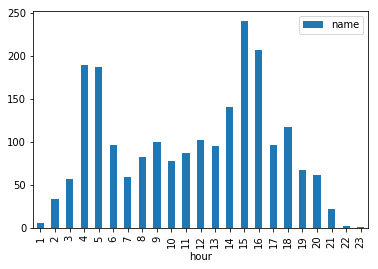

In [76]:
df_mita[['name', 'hour']].groupby('hour').count().plot(kind='bar')

In [91]:
list_mita_hr_blocks = [[1, 2, 3], [4, 5], [6, 7, 8, 9, 10, 11, 12, 13, 14], 
                       [15, 16], [17, 18, 19, 20, 21, 22, 23]]

In [95]:
test_list = list_mita_hr_blocks[0].copy()

In [97]:
test_list.extend(list_mita_hr_blocks[1])

In [98]:
test_list

[1, 2, 3, 4, 5]

In [124]:
df_mita[df_mita['hour'] == 2].value_counts()

,venueId,latitude,longitude,localTimestamp,id,line_id,line_name,name,next_0_name,next_1_name,hour,day
0,4b5da9e0f964a520bb6529e3,35.749,139.72,2012-04-04 02:59:52,9930317,99303,Toei Mita Line,Shinbashi,Nishikamo,Itabashi Ward Office,2,4
997,4b5da9e0f964a520bb6529e3,35.749,139.72,2012-04-09 02:58:46,9930317,99303,Toei Mita Line,Shinbashi,Nishikamo,Itabashi Ward Office,2,9
1155,4b5da9e0f964a520bb6529e3,35.749,139.72,2012-04-10 02:59:58,9930317,99303,Toei Mita Line,Shinbashi,Nishikamo,Itabashi Ward Office,2,10
3160,4b5da9e0f964a520bb6529e3,35.749,139.72,2012-04-17 02:59:28,9930317,99303,Toei Mita Line,Shinbashi,Nishikamo,Itabashi Ward Office,2,17
3334,4b5da9e0f964a520bb6529e3,35.749,139.72,2012-04-18 02:59:45,9930317,99303,Toei Mita Line,Shinbashi,Nishikamo,Itabashi Ward Office,2,18
5722,4b5da9e0f964a520bb6529e3,35.749,139.72,2012-04-26 02:59:45,9930317,99303,Toei Mita Line,Shinbashi,Nishikamo,Itabashi Ward Office,2,26
7997,4b5da9e0f964a520bb6529e3,35.749,139.72,2012-05-08 02:59:15,9930317,99303,Toei Mita Line,Shinbashi,Nishikamo,Itabashi Ward Office,2,8
8131,4b5da9e0f964a520bb6529e3,35.749,139.72,2012-05-09 02:58:25,9930317,99303,Toei Mita Line,Shinbashi,Nishikamo,Itabashi Ward Office,2,9
8693,4b5da9e0f964a520bb6529e3,35.749,139.72,2012-05-11 02:59:46,9930317,99303,Toei Mita Line,Shinbashi,Nishikamo,Itabashi Ward Office,2,11
9769,4b5da9e0f964a520bb6529e3,35.749,139.72,2012-05-14 02:58:18,9930317,99303,Toei Mita Line,Shinbashi,Nishikamo,Itabashi Ward Office,2,14


In [118]:
df_mita[(df_mita['day'] == 5) & (df_mita['hour'].isin(list_mita_hr_blocks[2]))]

,venueId,latitude,longitude,localTimestamp,id,line_id,line_name,name,next_0_name,next_1_name,hour,day
7386,4b845317f964a520c02e31e3,35.734,139.74,2012-05-05 07:28:34,9930315,99303,Toei Mita Line,Sugamo,Sengoku,Nishikamo,7,5
7393,4b7b65f0f964a520e2612fe3,35.661,139.75,2012-05-05 07:52:16,9930306,99303,Toei Mita Line,The gate,Shibakoen,Uchisaiwasemachi,7,5
7400,4b7b65f0f964a520e2612fe3,35.661,139.75,2012-05-05 08:22:40,9930306,99303,Toei Mita Line,The gate,Shibakoen,Uchisaiwasemachi,8,5
7405,4b845317f964a520c02e31e3,35.734,139.74,2012-05-05 08:44:50,9930315,99303,Toei Mita Line,Sugamo,Sengoku,Nishikamo,8,5
7427,4b54fe62f964a52000d727e3,35.643,139.73,2012-05-05 09:48:03,9930303,99303,Toei Mita Line,Shinkan Takanawa,Shirokanedai,Mita,9,5
15201,4b9b8cd2f964a520c30e36e3,35.676,139.76,2012-06-05 06:30:19,9930308,99303,Toei Mita Line,Hibiya,Uchisaiwasemachi,Otemachi,6,5
15261,4b54fe62f964a52000d727e3,35.643,139.73,2012-06-05 09:52:41,9930303,99303,Toei Mita Line,Shinkan Takanawa,Shirokanedai,Mita,9,5
15263,4b680223f964a520bd632be3,35.648,139.75,2012-06-05 09:59:06,9930304,99303,Toei Mita Line,Mita,Shinkan Takanawa,Shibakoen,9,5
15291,4b9b8cd2f964a520c30e36e3,35.676,139.76,2012-06-05 10:47:35,9930308,99303,Toei Mita Line,Hibiya,Uchisaiwasemachi,Otemachi,10,5
15315,4b7b65f0f964a520e2612fe3,35.661,139.75,2012-06-05 12:22:56,9930306,99303,Toei Mita Line,The gate,Shibakoen,Uchisaiwasemachi,12,5


In [108]:
df_mita[df_mita['hour'].isin(list_mita_hr_blocks[0])]

,venueId,latitude,longitude,localTimestamp,id,line_id,line_name,name,next_0_name,next_1_name,hour
0,4b5da9e0f964a520bb6529e3,35.749,139.72,2012-04-04 02:59:52,9930317,99303,Toei Mita Line,Shinbashi,Nishikamo,Itabashi Ward Office,2
997,4b5da9e0f964a520bb6529e3,35.749,139.72,2012-04-09 02:58:46,9930317,99303,Toei Mita Line,Shinbashi,Nishikamo,Itabashi Ward Office,2
1155,4b5da9e0f964a520bb6529e3,35.749,139.72,2012-04-10 02:59:58,9930317,99303,Toei Mita Line,Shinbashi,Nishikamo,Itabashi Ward Office,2
2955,4b5da9e0f964a520bb6529e3,35.749,139.72,2012-04-16 03:05:45,9930317,99303,Toei Mita Line,Shinbashi,Nishikamo,Itabashi Ward Office,3
3160,4b5da9e0f964a520bb6529e3,35.749,139.72,2012-04-17 02:59:28,9930317,99303,Toei Mita Line,Shinbashi,Nishikamo,Itabashi Ward Office,2
3334,4b5da9e0f964a520bb6529e3,35.749,139.72,2012-04-18 02:59:45,9930317,99303,Toei Mita Line,Shinbashi,Nishikamo,Itabashi Ward Office,2
3889,4b5da9e0f964a520bb6529e3,35.749,139.72,2012-04-20 03:04:07,9930317,99303,Toei Mita Line,Shinbashi,Nishikamo,Itabashi Ward Office,3
4737,4b5da9e0f964a520bb6529e3,35.749,139.72,2012-04-23 03:04:09,9930317,99303,Toei Mita Line,Shinbashi,Nishikamo,Itabashi Ward Office,3
5105,4b5da9e0f964a520bb6529e3,35.749,139.72,2012-04-24 03:04:22,9930317,99303,Toei Mita Line,Shinbashi,Nishikamo,Itabashi Ward Office,3
5722,4b5da9e0f964a520bb6529e3,35.749,139.72,2012-04-26 02:59:45,9930317,99303,Toei Mita Line,Shinbashi,Nishikamo,Itabashi Ward Office,2


In [68]:
df_mita[df_mita['hour'] == 2]['name'].value_counts()

Shinbashi          26
Mita                3
Takashimairaira     3
Hibiya              1
Sugamo              1
Name: name, dtype: int64

In [88]:
df_mita.head()

,venueId,latitude,longitude,localTimestamp,id,line_id,line_name,name,next_0_name,next_1_name,hour
0,4b5da9e0f964a520bb6529e3,35.749,139.72,2012-04-04 02:59:52,9930317,99303,Toei Mita Line,Shinbashi,Nishikamo,Itabashi Ward Office,2
7,4b9b8cd2f964a520c30e36e3,35.676,139.76,2012-04-04 04:12:01,9930308,99303,Toei Mita Line,Hibiya,Uchisaiwasemachi,Otemachi,4
13,4dc5e8f5e4cd169dc659fe4d,35.792,139.65,2012-04-04 04:23:00,9930327,99303,Toei Mita Line,Nishi Takashimairaira,Shin Takeshimairing,NaN,4
27,4dc5e8f5e4cd169dc659fe4d,35.792,139.65,2012-04-04 04:51:43,9930327,99303,Toei Mita Line,Nishi Takashimairaira,Shin Takeshimairing,NaN,4
56,4b2c4c0bf964a52075c524e3,35.654,139.75,2012-04-04 05:18:12,9930305,99303,Toei Mita Line,Shibakoen,Mita,The gate,5


In [20]:
dict_visited = {}
count = -1
df_test = df_maerged[df_merged['line_name'] == 'Toei Mita Line']
for ix, row in df_test.iterrows():
    count += 1
    next_0_name = row['next_0_name']
    next_1_name = row['next_1_name']
    name = row['name']
    if name not in dict_visited:
        dict_visited[name] = {'count': 0, next_0_name: 0, next_1_name: 0, name: 0}
    else:
        dict_visited[name]['count'] += 1
        df_test_runner = df_test[count:]
        add_self = True
        for ix, row in df_test_runner.iterrows():
            if row['name'] == next_0_name:
                dict_visited[name][next_0_name] += 1
#                 print('Transition: {} -> {}'.format(name, row['name']))
                add_self = False
                break
            elif row['name'] == next_1_name:
                dict_visited[name][next_1_name] += 1
#                 print('Transition: {} -> {}'.format(name, row['name']))
                add_self = False
                break
            else:
                pass
        if add_self:
            dict_visited[name][name] += 1

In [21]:
dict_visited

{'Hakusan': {'Hakusan': 0, 'Kasuga': 26, 'Sengoku': 52, 'count': 78},
 'Hibiya': {'Hibiya': 5,
  'Otemachi': 102,
  'Uchisaiwasemachi': 228,
  'count': 335},
 'Itabashi Ward Office': {'Itabashi Honcho': 0,
  'Itabashi Ward Office': 0,
  'Shinbashi': 20,
  'count': 20},
 'Jimbocho': {'Aqueduct': 0, 'Jimbocho': 0, 'Otemachi': 28, 'count': 28},
 'Kasuga': {'Aqueduct': 0, 'Hakusan': 21, 'Kasuga': 0, 'count': 21},
 'Meguro': {'count': 13, nan: 0, 'Shirokanedai': 0, 'Meguro': 13},
 'Mita': {'Mita': 4, 'Shibakoen': 156, 'Shinkan Takanawa': 238, 'count': 398},
 'Nishi Takashimairaira': {'count': 58,
  'Shin Takeshimairing': 54,
  nan: 0,
  'Nishi Takashimairaira': 4},
 'Nishidai': {'Nishidai': 2,
  'Takashimairaira': 47,
  'count': 54,
  'lotus root': 5},
 'Nishikamo': {'Nishikamo': 0, 'Shinbashi': 24, 'Sugamo': 21, 'count': 45},
 'Otemachi': {'Hibiya': 56, 'Jimbocho': 1, 'Otemachi': 0, 'count': 57},
 'Sengoku': {'Hakusan': 12, 'Sengoku': 0, 'Sugamo': 23, 'count': 35},
 'Shibakoen': {'Mita': 1

In [26]:
names = df_merged[df_merged['line_name'] == 'Toei Mita Line']['name'].unique()

In [35]:
names

array(['Shinbashi', 'Hibiya', 'Nishi Takashimairaira', 'Shibakoen',
       'Hakusan', 'The gate', 'Uchisaiwasemachi', 'Jimbocho', 'Mita',
       'Takashimairaira', 'Shimura 3-chome', 'Shinkan Takanawa',
       'Nishikamo', 'Itabashi Ward Office', 'Sugamo', 'This lotusuma',
       'Nishidai', 'Meguro', 'Sengoku', 'Otemachi', 'lotus root', 'Kasuga',
       'Shin Takeshimairing'], dtype=object)

In [27]:
dict_transition = {}
for name in names:
    dict_transition[name] = []
    for subname in names:
        if subname in dict_visited[name]:
            dict_transition[name].append(dict_visited[name][subname] / dict_visited[name]['count'])
        else:
            dict_transition[name].append(0)

In [34]:
dict_transition

{'Hakusan': [0,
  0,
  0,
  0,
  0.0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.6666666666666666,
  0,
  0,
  0.3333333333333333,
  0],
 'Hibiya': [0,
  0.014925373134328358,
  0,
  0,
  0,
  0,
  0.6805970149253732,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.3044776119402985,
  0,
  0,
  0],
 'Itabashi Ward Office': [1.0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'Jimbocho': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1.0,
  0,
  0,
  0],
 'Kasuga': [0,
  0,
  0,
  0,
  1.0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.0,
  0],
 'Meguro': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1.0,
  0,
  0,
  0,
  0,
  0],
 'Mita': [0,
  0,
  0,
  0.39195979899497485,
  0,
  0,
  0,
  0,
  0.010050251256281407,
  0,
  0,
  0.5979899497487438,
  

In [33]:
pd.DataFrame.from_dict(dict_transition)

,Hakusan,Hibiya,Itabashi Ward Office,Jimbocho,Kasuga,Meguro,Mita,Nishi Takashimairaira,Nishidai,Nishikamo,...,Shimura 3-chome,Shin Takeshimairing,Shinbashi,Shinkan Takanawa,Sugamo,Takashimairaira,The gate,This lotusuma,Uchisaiwasemachi,lotus root
0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.533333,...,0.00,0.0,0.015873,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
1,0.000000,0.014925,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,...,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.857143,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.068966,0.000000,0.000000,...,0.00,0.5,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.39196,0.000000,0.000000,0.000000,...,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.643564,0.0,0.000000,0.0
4,0.000000,0.000000,0.0,0.0,1.0,0.0,0.00000,0.000000,0.000000,0.000000,...,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
5,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,...,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.009901,0.0,0.142857,0.0
6,0.000000,0.680597,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,...,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.346535,0.0,0.000000,0.0
7,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,...,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
8,0.000000,0.000000,0.0,0.0,0.0,0.0,0.01005,0.000000,0.000000,0.000000,...,0.00,0.0,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
9,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.870370,0.000000,...,0.00,0.5,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0


In [32]:
pd.__version__

'0.20.3'

In [125]:
df_merged.head()

,venueId,latitude,longitude,localTimestamp,id,line_id,line_name,name,next_0_name,next_1_name
0,4b5da9e0f964a520bb6529e3,35.749,139.72,2012-04-04 02:59:52,9930317,99303,Toei Mita Line,Shinbashi,Nishikamo,Itabashi Ward Office
1,4b7481e1f964a520bde02de3,35.730,139.71,2012-04-04 03:52:17,2800609,28006,Tokyo Metro Yurakucho Line,Ikebukuro,Town,Higashi Ikebukuro
2,4b7481e1f964a520bde02de3,35.730,139.71,2012-04-04 03:52:17,2800201,28002,Tokyo Metro Marunouchi Line,Ikebukuro,NaN,Shin-Otsuka
3,4b2692f9f964a520be7d24e3,35.689,139.71,2012-04-04 03:56:43,2800216,28002,Tokyo Metro Marunouchi Line,Shinjuku Gyoenmae front,Yotsuya 3-chome,Shinjuku 3-chome
4,4b5599caf964a5209be827e3,35.670,139.82,2012-04-04 04:06:34,2800414,28004,Tokyo Metro Tozai Line,Toyocho,Kiba,Minami-sen
